# Wine Quality

**Bianka Passos**

## Introdução

O objetivo deste notebook é analisar as relações entre as características físico‑químicas e a qualidade sensorial de vinhos.

O estudo inicia com a obtenção dos dados diretamente do UCI Machine Learning Repository, que disponibiliza dois conjuntos de observações: um de vinhos tintos e outro de vinhos brancos.

O dados estão disponíveis em: https://archive.ics.uci.edu/dataset/186/wine+quality

# Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Aquisição dos Dados

In [2]:
# URLs dos CSVs na UCI
URL_WHITE = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
URL_RED = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

white = pd.read_csv(URL_WHITE, sep=';')
red = pd.read_csv(URL_RED, sep=';')

# Preparação dos Dados

Para facilitar o uso dos dados as informações de ambos os tipos de vinho são unificadas em um único dataframe. Além disso, foi adicionada uma coluna com o rótulo do tipo de vinho, bem como alterado o nome das colunas para o padrão snake_case, com o objetivo de facilitar o uso e chamada das features ao longo da análise e desenvolvimento.

In [3]:
white.shape

(4898, 12)

In [4]:
red.shape

(1599, 12)

In [5]:
white['wine_type'] = 0
red['wine_type'] = 1

df = pd.concat([red, white], ignore_index=True)
df = df.rename(columns=lambda s: s.strip().lower().replace(" ", "_"))

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


# Análise Explotarória dos Dados

In [6]:
# linhas e colunas
df.shape

(6497, 13)

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
# valores faltantes
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


**Insights**

O dataset não possui valores faltantes em nenhuma das features, logo não requer testes com abordagens para preenchimento dos dados como média, mediana ou moda.

In [9]:
# informações sobre o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [11]:
# Avaliar desvio padrão das features/colunas

std_devs = df.std()

low_var = df.describe().loc['std'] < 0.1
low_var_cols = df.columns[low_var].tolist()

low_var_cols

['chlorides', 'density']

<ipython-input-12-d2be83bb898d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=std_devs.index, y=std_devs.values, palette="viridis")


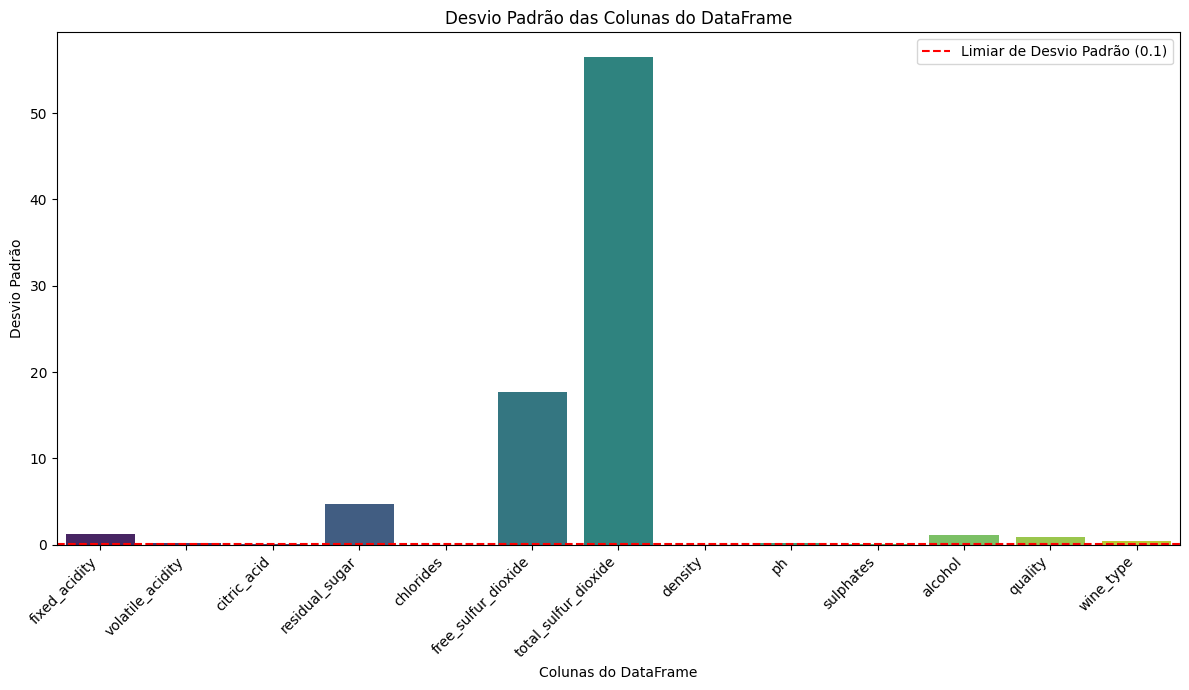

In [12]:
# Visualizar desvio padrão

plt.figure(figsize=(12, 7))

bars = sns.barplot(x=std_devs.index, y=std_devs.values, palette="viridis")

plt.axhline(y=0.1, color='r', linestyle='--', label='Limiar de Desvio Padrão (0.1)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Desvio Padrão')
plt.xlabel('Colunas do DataFrame')
plt.title('Desvio Padrão das Colunas do DataFrame')
plt.legend()
plt.tight_layout()

for bar in bars.patches:
    if std_devs[bars.get_xticklabels()[bars.patches.index(bar)].get_text()] < 0.1:
        bar.set_color('salmon')

plt.show()

**Insights com base na análise do gráfico**

*  O desvio padrão é uma medida que indica o quão espalhados estão os valores de da variável em torno da sua média.
* `total_sulfur_dioxide` tem um desvio padrão bem alto, próximo de 60.
* `free_sulfur_dioxide` apresenta um desvio padrão elevado, não tanto quanto a variável anterior, mas bastante expressivo por ser próximo de 20.
* `residual_sugar` tem um desvio padrão relativamente ok, em torno de 5.
* A discrepância nas escalas é um ponto que precisa ser tratado antes de treinar a maioria dos algoritmos de machine learning.

In [13]:
# Calcular a matriz de correlação
# O método padrão é Pearson, que mede correlações lineares.
correlation_matrix = df.corr()

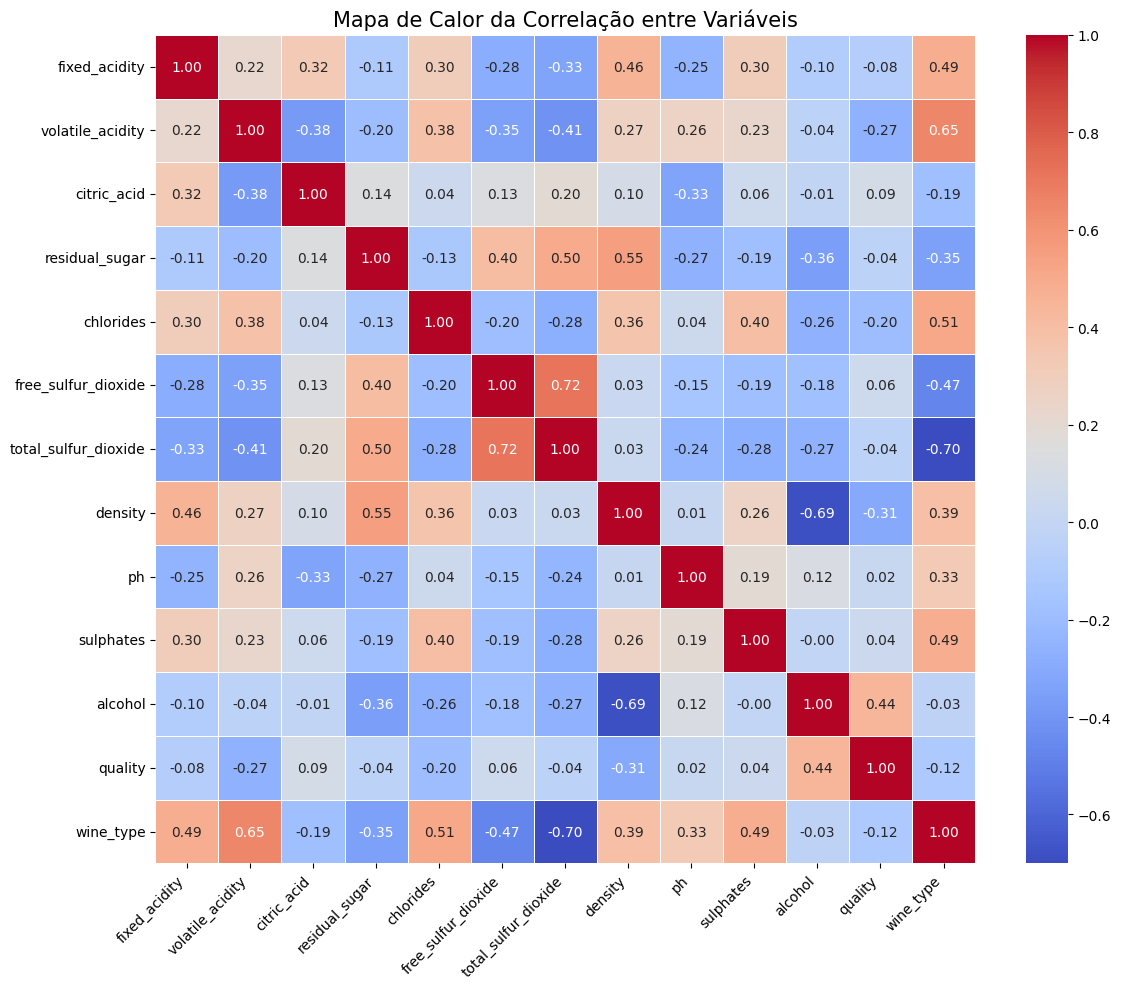

In [14]:
# Gerar o mapa de calor (heatmap)

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,       # Mostrar os valores de correlação nas células
            cmap='coolwarm',  # Escolha um mapa de cores (ex: 'coolwarm', 'viridis', 'RdBu_r')
            fmt=".2f",        # Formatar as anotações para duas casas decimais
            linewidths=.5)    # Adicionar linhas entre as células para melhor visualização

plt.title('Mapa de Calor da Correlação entre Variáveis', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

**Insights sobre o mapa de calor**

* Valores Próximos de 1.0 (Vermelho Forte): Indicam uma correlação positiva forte. Quando uma variável aumenta, a outra tende a aumentar também.
* Valores Próximos de -1.0 (Azul Forte): Indicam uma correlação negativa forte. Quando uma variável aumenta, a outra tende a diminuir.
* Valores Próximos de 0 (Cores Claras/Branco): Indicam pouca ou nenhuma correlação linear entre as variáveis.

**Correlação com a Variável Alvo (quality)**
Estas parecem ser as features mais interessantes para prever a qualidade do vinho:

* alcohol (0.44): apresenta a correlação positiva mais forte com quality.
* density (-0.31): revela que vinhos menos densos tendem a ter uma qualidade maior.
* volatile_acidity (-0.27): indicativo de que quanto maior a acidez volátil, menor a qualidade.
* chlorides (-0.20): correlação negativa fraca.
* Outras: as demais features (citric_acid, sulphates, etc.) têm uma correlação muito fraca (próxima de zero) com a quality, sugerindo que elas apresentam pouco impacto preditivo.

**Correlação entre features**

* `free_sulfur_dioxide` e `total_sulfur_dioxide` (0.72): Correlação positiva muito forte. Como um é parte do outro, elas são redundantes.
* `density` e `alcohol` (-0.69): Correlação negativa muito forte.
* `fixed_acidity` e `ph` (-0.49): Correlação negativa moderada. Quanto mais ácido menor é o pH.
* `wine_type` e outras features: Tem correlações fortes com `total_sulfur_dioxide` (-0.70) e `volatile_acidity` (0.65). O que indica que essas features são boas candidatas para distinguir entre os tipos de vinho, caso seja de interesse considerar o tipo como variável target do modelo.


In [15]:
df['sulfur_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']
df['sulfur_ratio'] = df['sulfur_ratio'].fillna(0)

df_engineered = df.drop(columns=['free_sulfur_dioxide', 'total_sulfur_dioxide'])

In [16]:
df = df_engineered

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,density,ph,sulphates,alcohol,quality,wine_type,sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,5,1,0.323529
1,7.8,0.88,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,5,1,0.373134
2,7.8,0.76,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,5,1,0.277778
3,11.2,0.28,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,6,1,0.283333
4,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,5,1,0.323529
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,0.99114,3.27,0.50,11.2,6,0,0.260870
6493,6.6,0.32,0.36,8.0,0.047,0.99490,3.15,0.46,9.6,5,0,0.339286
6494,6.5,0.24,0.19,1.2,0.041,0.99254,2.99,0.46,9.4,6,0,0.270270
6495,5.5,0.29,0.30,1.1,0.022,0.98869,3.34,0.38,12.8,7,0,0.181818


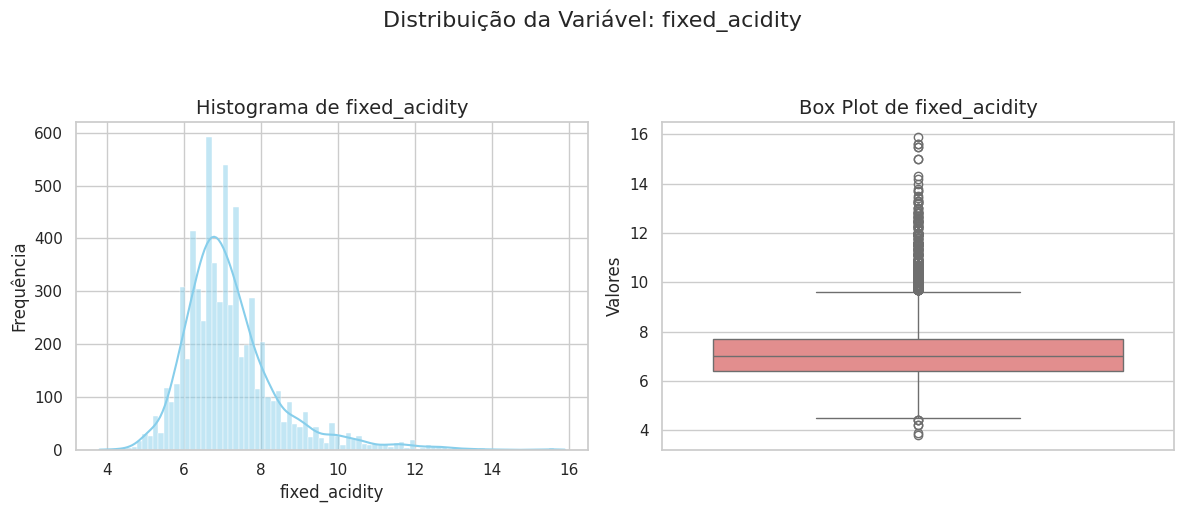

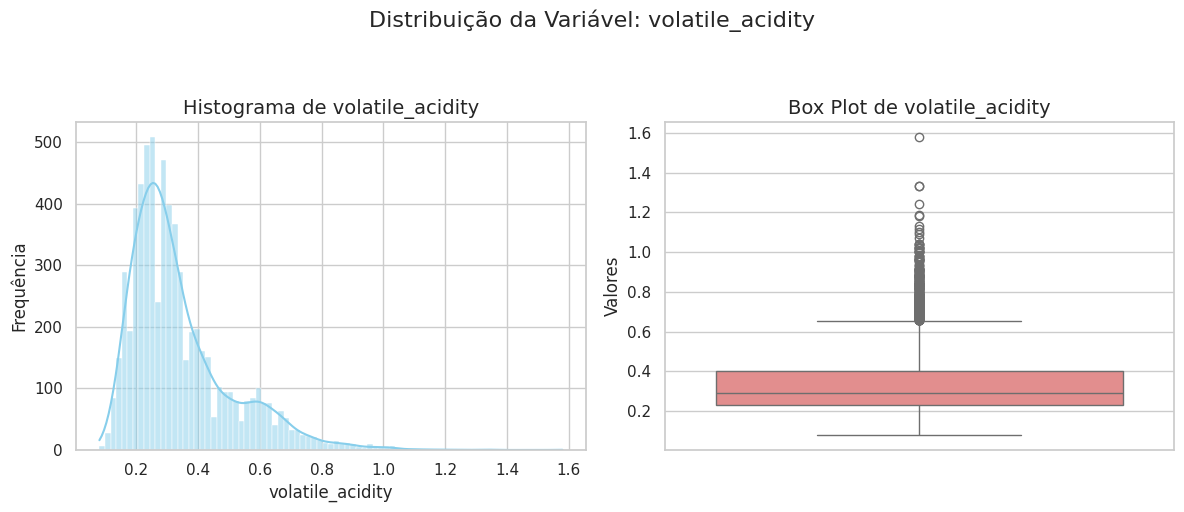

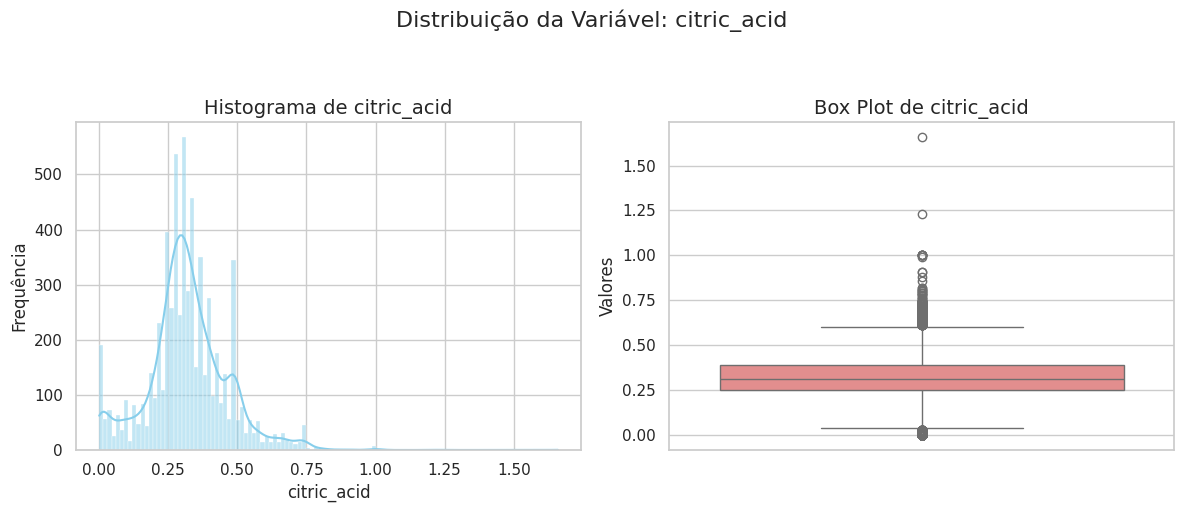

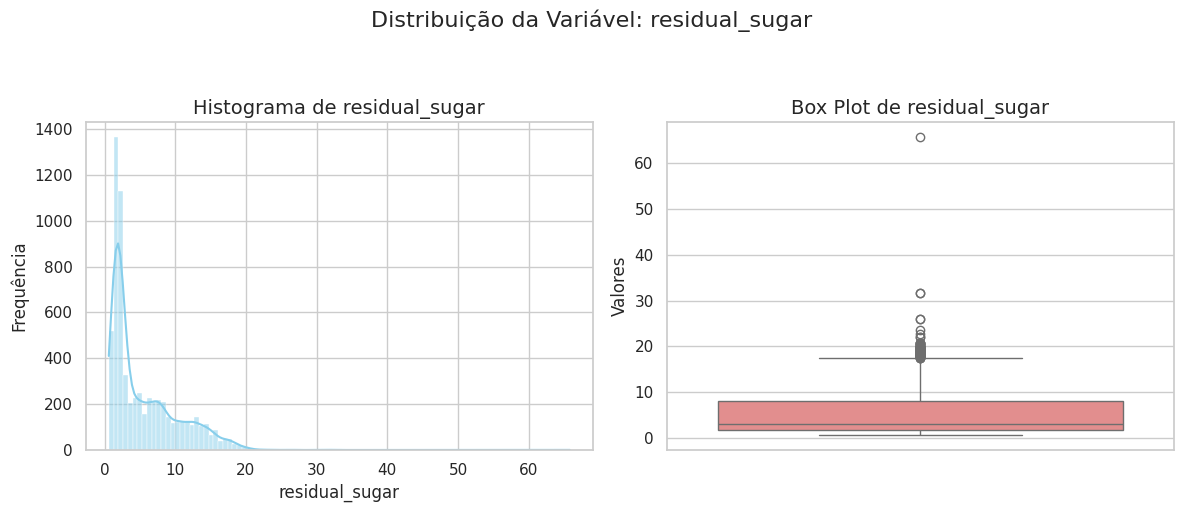

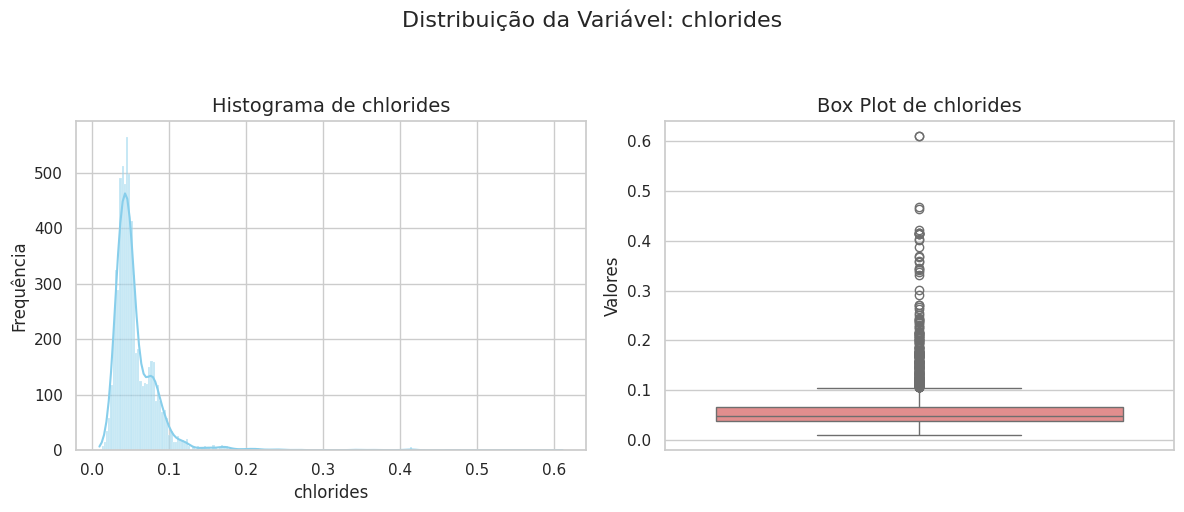

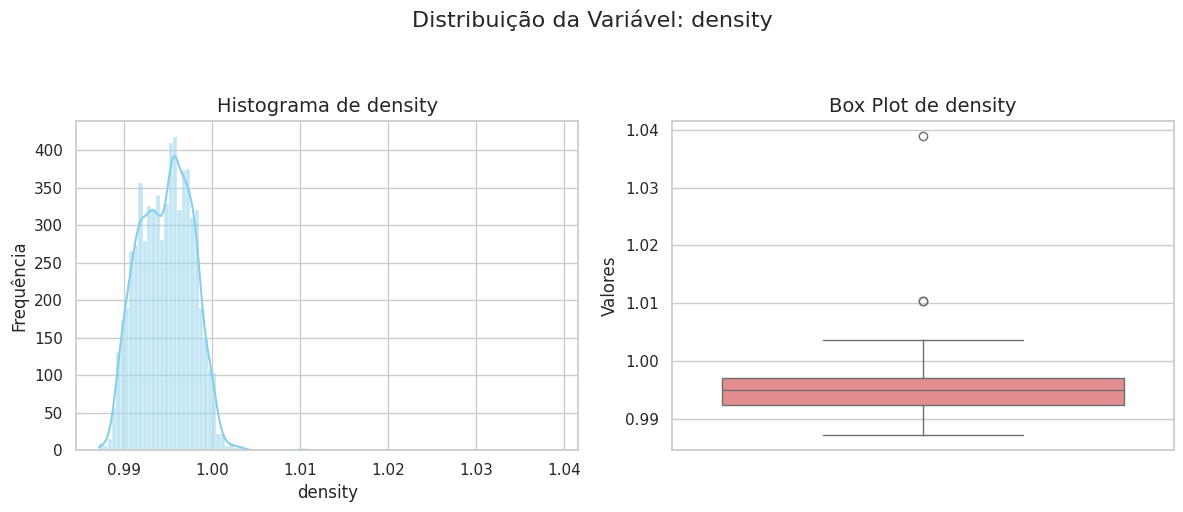

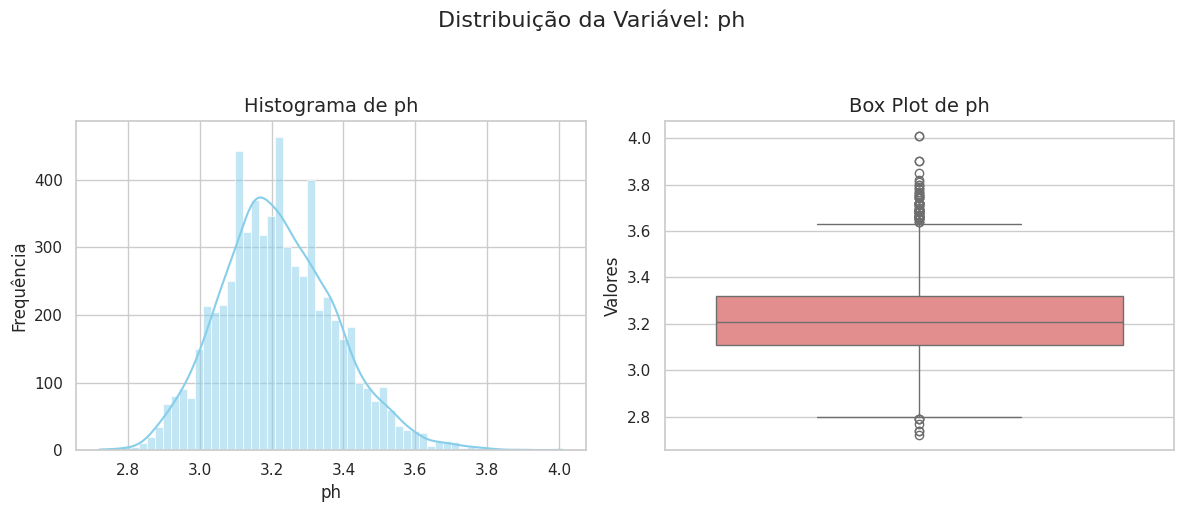

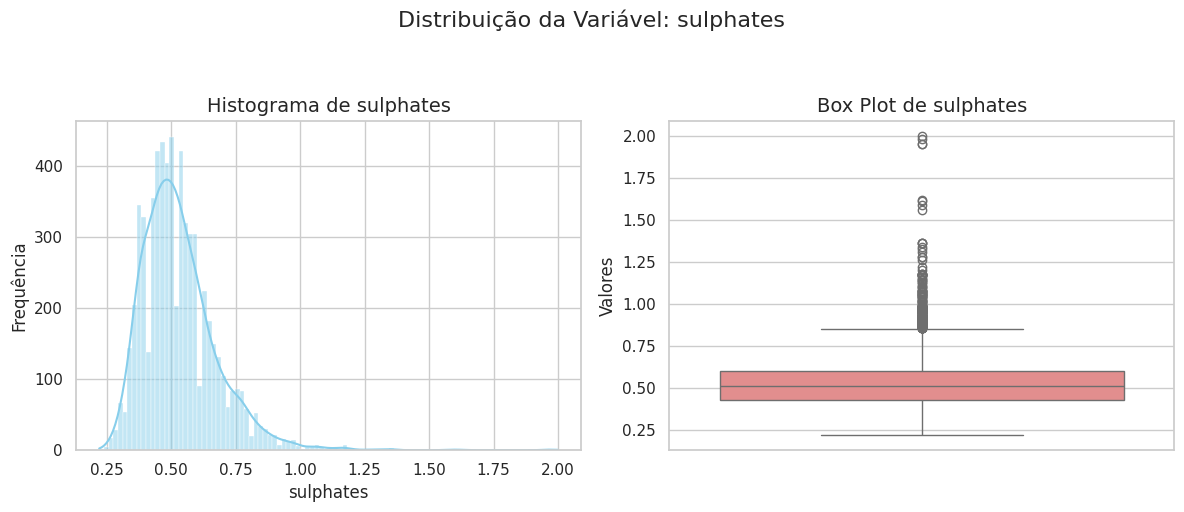

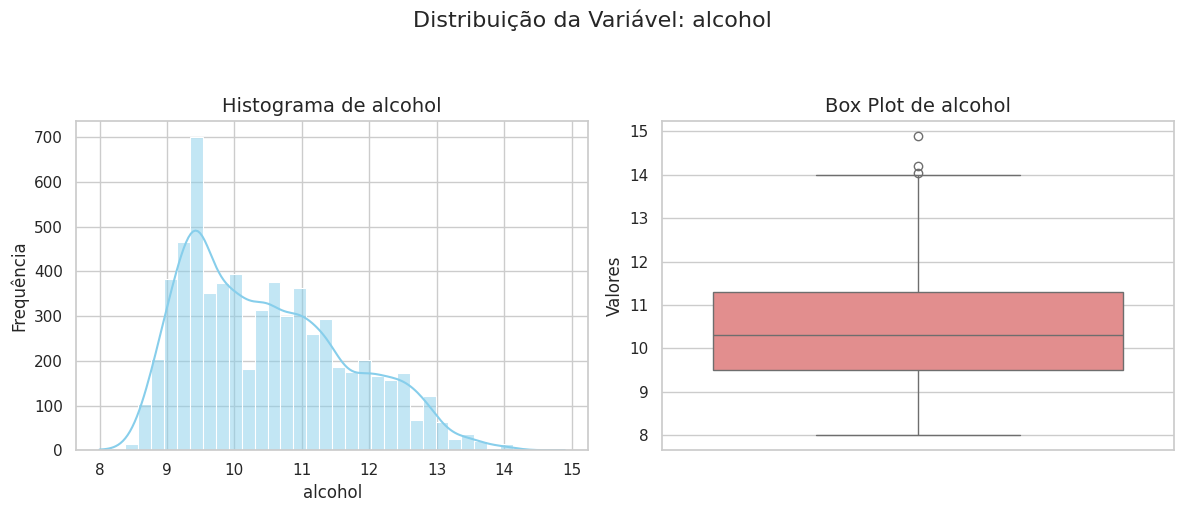

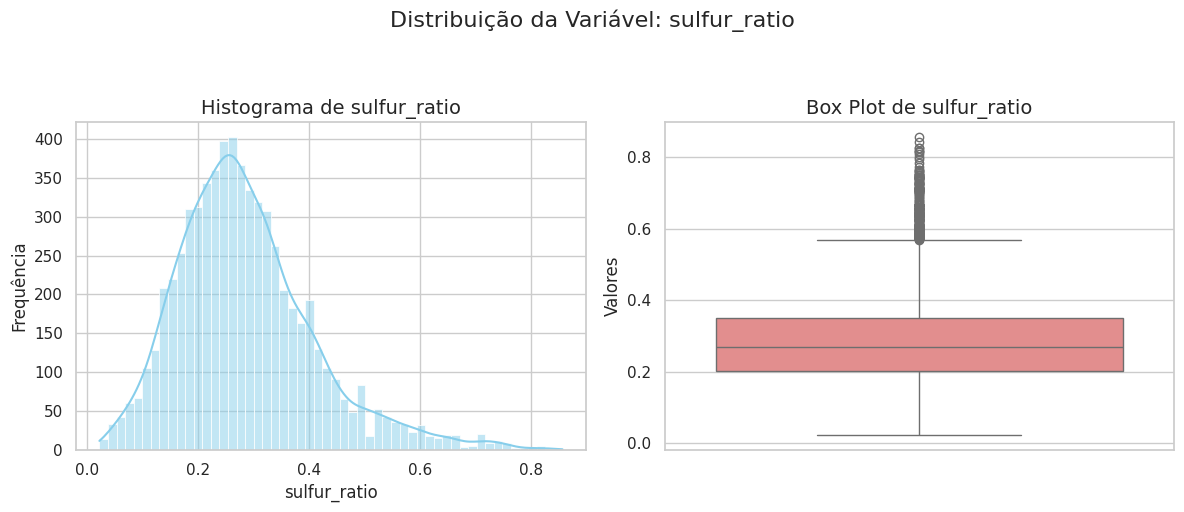

In [17]:
sns.set_theme(style="whitegrid")

colums = df.columns.tolist()
colums.remove('wine_type')
colums.remove('quality')

for col_name in colums:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma
    sns.histplot(df[col_name], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histograma de {col_name}', fontsize=14)
    axes[0].set_xlabel(col_name, fontsize=12)
    axes[0].set_ylabel('Frequência', fontsize=12)

    # Box Plot
    sns.boxplot(y=df[col_name], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Box Plot de {col_name}', fontsize=14)
    axes[1].set_ylabel('Valores', fontsize=12)

    plt.suptitle(f'Distribuição da Variável: {col_name}', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

**Insights sobre a distribuição das variáveis**

* `fixed_acidity`: a maioria dos dados se concentra entre 6 e 8, com uma "cauda" longa de valores mais altos.
* `volatile_acidity`: existe um pico principal em valores baixos (0.2-0.4) e uma cauda longa.
* `citric_acid`: Sugere que há um grupo de vinhos com zero ou quase zero ácido cítrico e outro grupo com uma quantidade mais significativa.
* `residual_sugar`: A grande maioria dos vinhos tem pouco açúcar residual.
* `chlorides`: com um pico muito agudo.
* `density`: é bem simétrica e centrada.
* `ph`: a distribuição é bastante simétrica.
* `sulphates`: possui uma clara assimetria à direita
* `alcohol`: a maior parte dos valores são mais altos (entre 9 e 12), com uma cauda que se estende para a esquerda.
* `sulfur_ratio`: mostra a maioria dos valores concentrados à esquerda (valores baixos), com uma cauda longa que se estende para a direita.

**Proposta**
1. Para Assimetria à Direita, a primeira tentativa é quase sempre uma transformação logarítmica.
2. Para Assimetria à Esquerda, a primeira tentativa é quase sempre uma transformação de potência.
3. Quando uma variável se divide em dois grupos claros, a melhor ideia é transformar isso em uma coluna binária.

In [18]:
df['has_citric_acid'] = (df['citric_acid'] > 0).astype(int)
df = df.drop(columns=['citric_acid'])

df

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,density,ph,sulphates,alcohol,quality,wine_type,sulfur_ratio,has_citric_acid
0,7.4,0.70,1.9,0.076,0.99780,3.51,0.56,9.4,5,1,0.323529,0
1,7.8,0.88,2.6,0.098,0.99680,3.20,0.68,9.8,5,1,0.373134,0
2,7.8,0.76,2.3,0.092,0.99700,3.26,0.65,9.8,5,1,0.277778,1
3,11.2,0.28,1.9,0.075,0.99800,3.16,0.58,9.8,6,1,0.283333,1
4,7.4,0.70,1.9,0.076,0.99780,3.51,0.56,9.4,5,1,0.323529,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,1.6,0.039,0.99114,3.27,0.50,11.2,6,0,0.260870,1
6493,6.6,0.32,8.0,0.047,0.99490,3.15,0.46,9.6,5,0,0.339286,1
6494,6.5,0.24,1.2,0.041,0.99254,2.99,0.46,9.4,6,0,0.270270,1
6495,5.5,0.29,1.1,0.022,0.98869,3.34,0.38,12.8,7,0,0.181818,1


<ipython-input-19-e00b040e4350>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


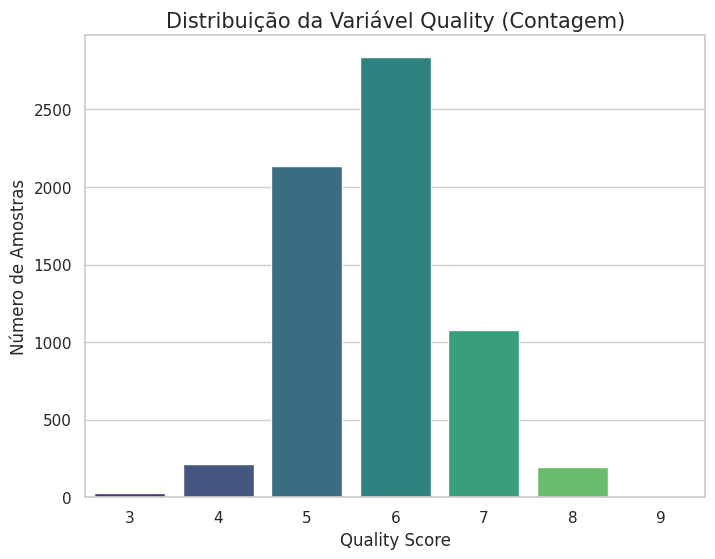


Contagem de valores para 'quality':
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [19]:
if 'quality' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='quality', data=df, palette='viridis')
    plt.title('Distribuição da Variável Quality (Contagem)', fontsize=15)
    plt.xlabel('Quality Score', fontsize=12)
    plt.ylabel('Número de Amostras', fontsize=12)
    plt.show()
    print("\nContagem de valores para 'quality':")
    print(df['quality'].value_counts().sort_index())

**Desbalanceamento de Classes**

1. A grande maioria das amostras se concentra nas classes de qualidade 5 e 6.
2. As classes extremas, como 3, 4, 8 e 9, são muito raras. Sendo que a classe 9 quase não tem amostras.

**Propostas**

1. Simplificar o Problema: diminuir a granularidade dos níveis de qualidade, usando 3 classes (ruim, médio, bom) ou apenas duas classes (ruim/médio, bom)
2. SMOTE (Synthetic Minority Over-sampling Technique): cria novas amostras sintéticas das classes minoritárias.

In [20]:
def classify_quality(quality):
  """
  Classifica a qualidade do vinho em 2 categorias:
  - 0 (Ruim/Médio): se a qualidade for 6 ou inferior.
  - 1 (Bom): se a qualidade for 7 ou superior.
  """
  if quality <= 6:
      return 0  # Classe 'Ruim/Médio'
  else:
      return 1  # Classe 'Bom'

In [21]:
df['quality_label'] = df['quality'].apply(classify_quality)
df = df.drop(columns=['quality'])

df

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,density,ph,sulphates,alcohol,wine_type,sulfur_ratio,has_citric_acid,quality_label
0,7.4,0.70,1.9,0.076,0.99780,3.51,0.56,9.4,1,0.323529,0,0
1,7.8,0.88,2.6,0.098,0.99680,3.20,0.68,9.8,1,0.373134,0,0
2,7.8,0.76,2.3,0.092,0.99700,3.26,0.65,9.8,1,0.277778,1,0
3,11.2,0.28,1.9,0.075,0.99800,3.16,0.58,9.8,1,0.283333,1,0
4,7.4,0.70,1.9,0.076,0.99780,3.51,0.56,9.4,1,0.323529,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,1.6,0.039,0.99114,3.27,0.50,11.2,0,0.260870,1,0
6493,6.6,0.32,8.0,0.047,0.99490,3.15,0.46,9.6,0,0.339286,1,0
6494,6.5,0.24,1.2,0.041,0.99254,2.99,0.46,9.4,0,0.270270,1,0
6495,5.5,0.29,1.1,0.022,0.98869,3.34,0.38,12.8,0,0.181818,1,1


In [22]:
print("Nova distribuição (Ruim/Médio=0, Bom=1):")
print(df['quality_label'].value_counts())

Nova distribuição (Ruim/Médio=0, Bom=1):
quality_label
0    5220
1    1277
Name: count, dtype: int64


Gerando Box Plots das features em relação à 'quality':


<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


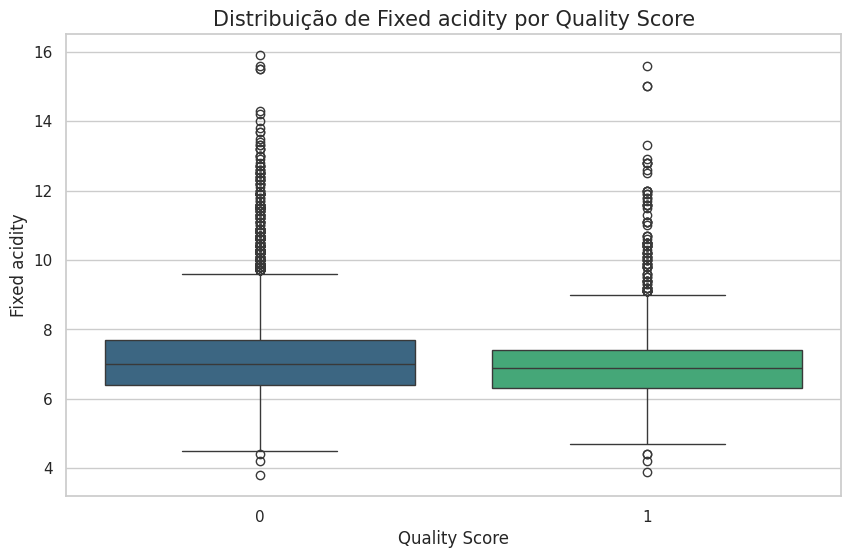

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


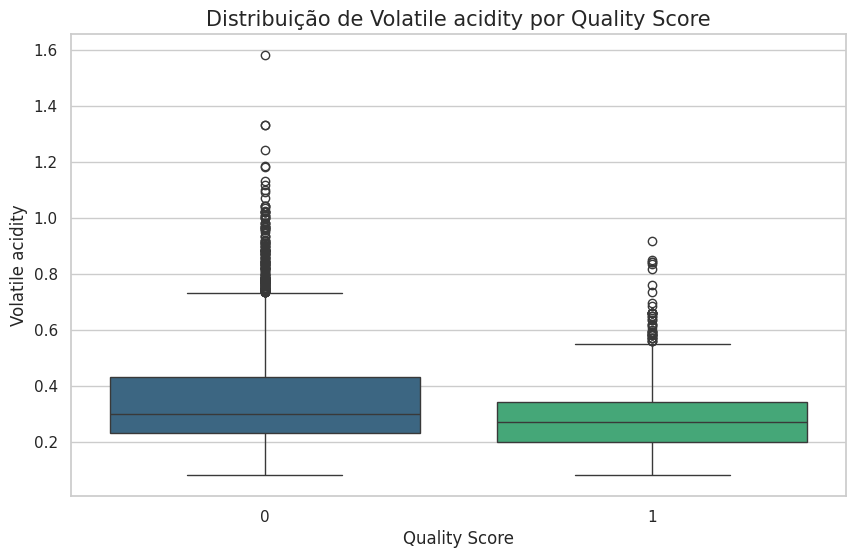

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


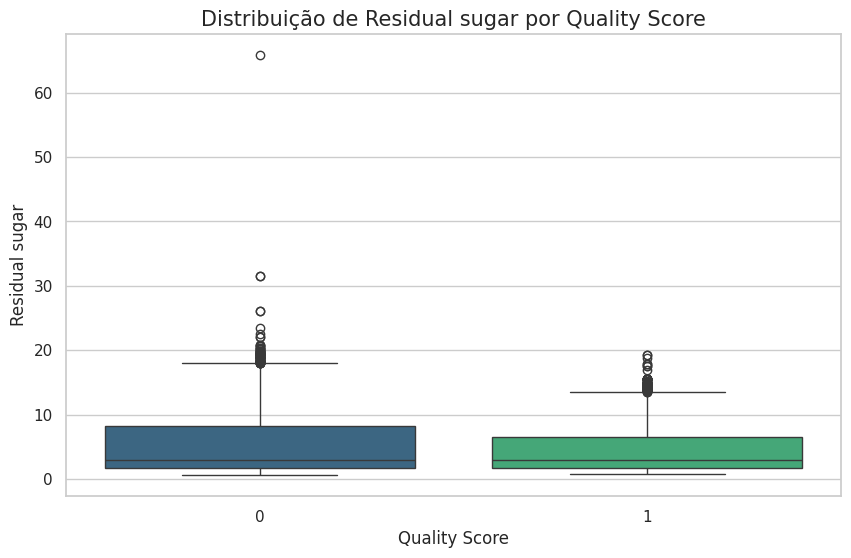

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


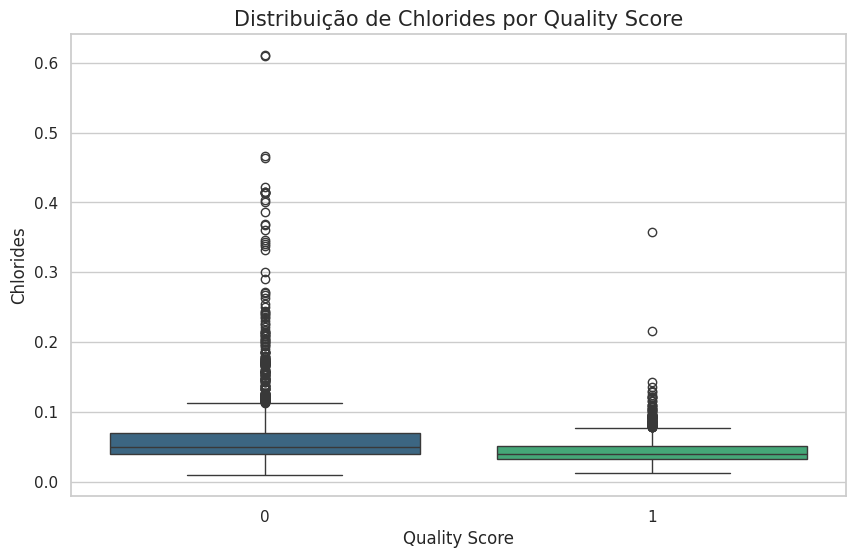

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


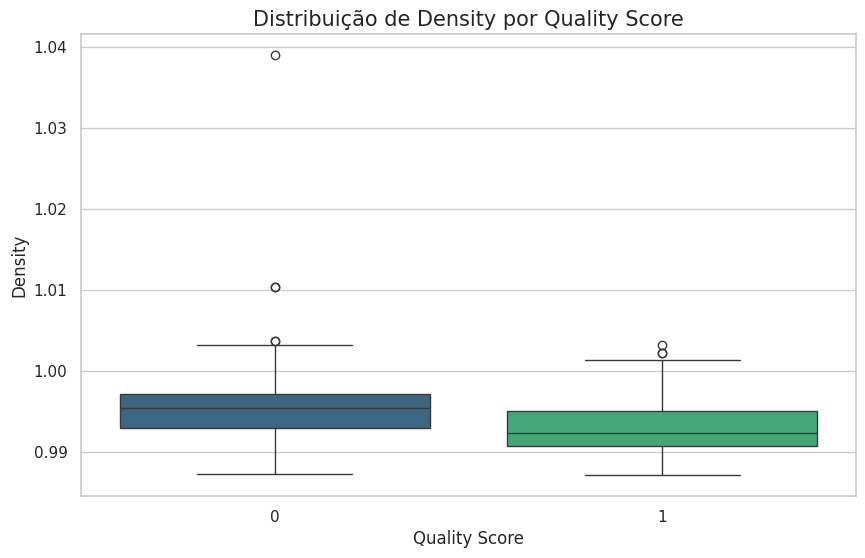

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


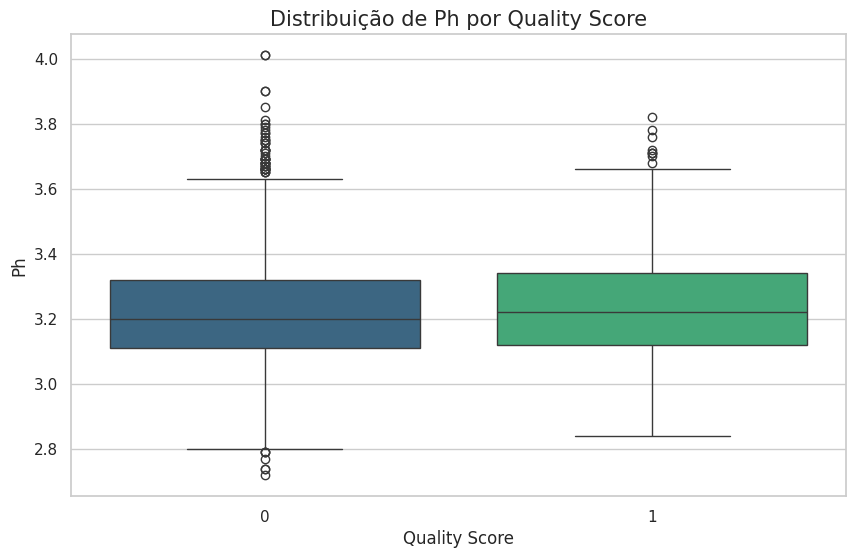

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


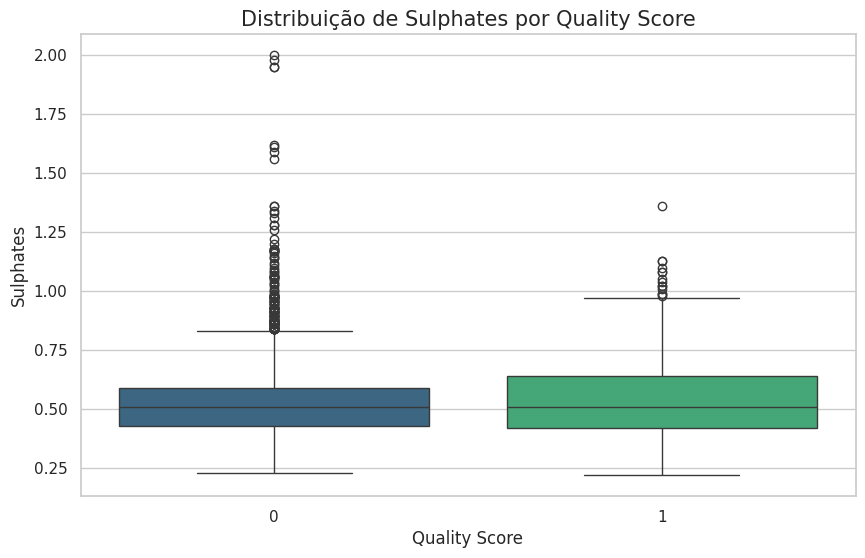

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


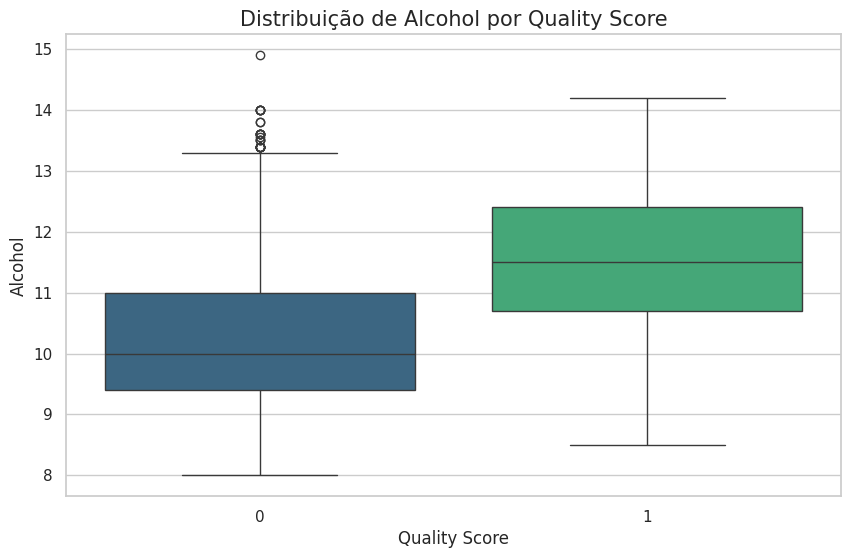

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


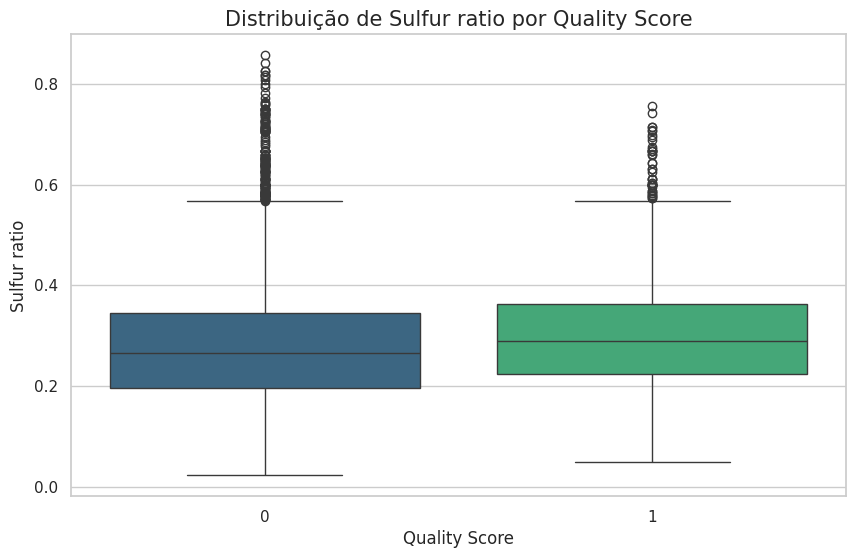

<ipython-input-23-5765ec1c0f1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")


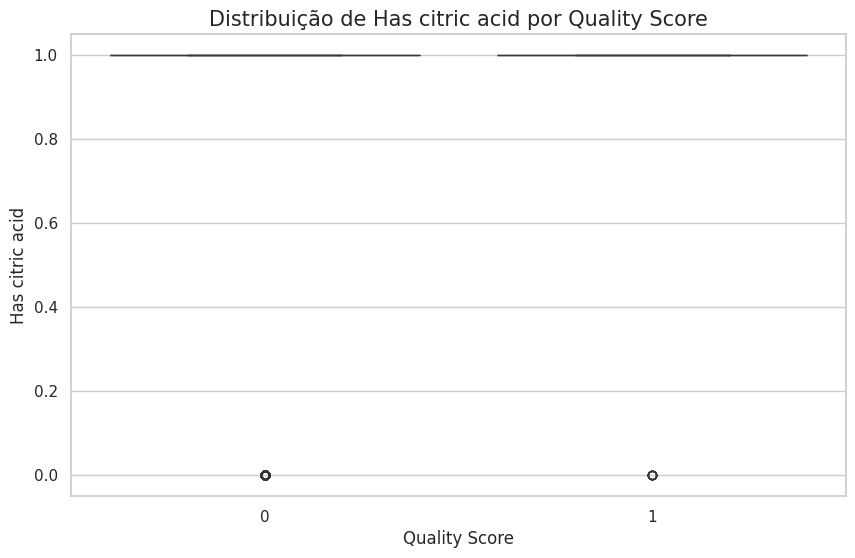

In [23]:
# Identificar colunas de features (exceto 'quality')
feature_cols = [col for col in df.columns if col not in ['quality_label', 'wine_type']]

sns.set_theme(style="whitegrid")

print("Gerando Box Plots das features em relação à 'quality':")

for feature_name in feature_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality_label', y=feature_name, data=df, palette="viridis")
    plt.title(f'Distribuição de {feature_name.replace("_"," ").capitalize()} por Quality Score', fontsize=15)
    plt.xlabel('Quality Score', fontsize=12)
    plt.ylabel(feature_name.replace("_"," ").capitalize(), fontsize=12)
    plt.show()

**Insights**

Foram verificadas que as features `residual_sugar` e `ph` teriam pouco impacto na classificação da qualidade do vinho devido serem informações bastante sobrepostas e a sua mediana estar bem próxima pela visualização do box plot.

**Proposta**

* Remover essas colunas.

In [24]:
df = df.drop(columns=['residual_sugar'])

In [25]:
df = df.drop(columns=['ph'])

In [26]:
df

,fixed_acidity,volatile_acidity,chlorides,density,sulphates,alcohol,wine_type,sulfur_ratio,has_citric_acid,quality_label
0,7.4,0.70,0.076,0.99780,0.56,9.4,1,0.323529,0,0
1,7.8,0.88,0.098,0.99680,0.68,9.8,1,0.373134,0,0
2,7.8,0.76,0.092,0.99700,0.65,9.8,1,0.277778,1,0
3,11.2,0.28,0.075,0.99800,0.58,9.8,1,0.283333,1,0
4,7.4,0.70,0.076,0.99780,0.56,9.4,1,0.323529,0,0
...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.039,0.99114,0.50,11.2,0,0.260870,1,0
6493,6.6,0.32,0.047,0.99490,0.46,9.6,0,0.339286,1,0
6494,6.5,0.24,0.041,0.99254,0.46,9.4,0,0.270270,1,0
6495,5.5,0.29,0.022,0.98869,0.38,12.8,0,0.181818,1,1


# Modelagem

In [27]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import sklearn
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

In [29]:
sklearn.set_config(transform_output="pandas")

X = df.drop(columns=['quality_label', 'wine_type'])
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

num_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [30]:
log_cols = ['fixed_acidity', 'volatile_acidity', 'chlorides', 'sulphates', 'sulfur_ratio']

scaler_cols = ['density']

power_cols = ['alcohol']

In [43]:
def apply_log(x):
  return np.log1p(x)

def apply_power_transform(x):
  return x**2

preprocessor = ColumnTransformer(
    transformers=[
        # Pipeline para colunas com assimetria à DIREITA
        ('log_pipeline', Pipeline([
            ('log_transform', FunctionTransformer(apply_log)),
            ('scaler', StandardScaler())
        ]), log_cols),

        # Pipeline para colunas com assimetria à ESQUERDA
        ('power_pipeline', Pipeline([
            # Aplicamos a transformação de potência (elevar ao quadrado)
            ('power_transform', FunctionTransformer(apply_power_transform)),
            ('scaler', StandardScaler())
        ]), power_cols),

        # Pipeline para colunas com distribuição normal
        ('scaler_pipeline', Pipeline([
            ('scaler', StandardScaler())
        ]), scaler_cols),

    ],
    # Pipeline para manter as demais colunas
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [32]:
models_to_test = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'CatBoost': cb.CatBoostClassifier(random_state=42, verbose=0)
}

In [33]:
model_results = {}
min_samples = y_train.value_counts().min()
k_neighbors_smote = max(1, min_samples - 1)

print(f"A menor classe no y_train tem {min_samples} amostras.")
print(f"O k_neighbors do SMOTE será ajustado para: {k_neighbors_smote}\n")

print(f"Iniciando avaliação em {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}...")
print("-" * 50)

# Loop através de cada modelo no dicionário
for model_name, model in models_to_test.items():

    # Monta o pipeline final: pré-processador + classificador
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, k_neighbors=k_neighbors_smote)),
        ('classifier', model)
    ])

    # Treina o modelo
    pipeline.fit(X_train, y_train)

    # Faz previsões no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Calcula as métricas de avaliação
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Armazena os resultados
    report = classification_report(y_test, y_pred, zero_division=0)
    model_results[model_name] = report

    print(f"Relatório de Classificação para {model_name}:\n")
    print(report)

A menor classe no y_train tem 1021 amostras.
O k_neighbors do SMOTE será ajustado para: 1020

Iniciando avaliação em 25/05/2025 20:53:44...
--------------------------------------------------
Relatório de Classificação para Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1044
           1       0.40      0.72      0.51       256

    accuracy                           0.73      1300
   macro avg       0.65      0.73      0.66      1300
weighted avg       0.81      0.73      0.75      1300

Relatório de Classificação para Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1044
           1       0.59      0.75      0.66       256

    accuracy                           0.85      1300
   macro avg       0.76      0.81      0.78      1300
weighted avg       0.87      0.85      0.85      1300

Relatório de Classificação para Support Vector Machin

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:53:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação para XGBoost:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1044
           1       0.62      0.62      0.62       256

    accuracy                           0.85      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.85      0.85      0.85      1300

Relatório de Classificação para CatBoost:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1044
           1       0.58      0.61      0.60       256

    accuracy                           0.84      1300
   macro avg       0.74      0.75      0.75      1300
weighted avg       0.84      0.84      0.84      1300



**Insights dos modelos testados**

* Acurácia Geral: Random Forest, LightGBM e XGBoost empataram com 85% de acurácia.
* Desempenho na Classe Minoritária: O Random Forest se destacou no F1-Score (0.66) para a classe 1 (vinhos "bons"), mostrando o melhor equilíbrio entre encontrar os vinhos bons e não cometer erros.

**Modelo Selecionado**

* Random Forest: foi o modelo mais equilibrado e com o melhor desempenho geral. Ele obteve uma acurácia alta (85%) e o melhor F1-Score (0.66) para a classe de vinhos bons. Seu Recall de 75% para a classe 1 é o mais alto, o que significa que ele foi o melhor em encontrar a maior parte dos vinhos bons existentes no conjunto de teste.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

param_dist = {
    'smote__k_neighbors': [5, 10, 15, 20],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Iniciando a busca por hiperparâmetros...")
random_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados:")
print(random_search.best_params_)

print("\n--- Relatório de Classificação do Modelo Otimizado ---")
best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

Iniciando a busca por hiperparâmetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


**Insights da Otimização**

* `n_estimators`: 400: Bateu no limite máximo testado inicialmente.
* `smote__k_neighbors`: 5: Bateu no limite mínimo.
* `max_depth`, `min_samples_split`, `min_samples_leaf`: ficaram em valores intermediários.

In [42]:
param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'classifier__n_estimators': [400, 500, 600],
    'classifier__max_depth': [25, 30, 35],
    'classifier__min_samples_split': [4, 5, 6],
    'classifier__min_samples_leaf': [1, 2, 3]
}

pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, max_features='sqrt'))
])

grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

print("Iniciando a busca refinada com GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros da busca refinada:")
print(grid_search.best_params_)

print("\n--- Relatório de Classificação do Modelo FINAL Otimizado ---")
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

Iniciando a busca refinada com GridSearchCV...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Melhores parâmetros da busca refinada:
{'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 500, 'smote__k_neighbors': 3}

--- Relatório de Classificação do Modelo FINAL Otimizado ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1044
           1       0.65      0.68      0.66       256

    accuracy                           0.86      1300
   macro avg       0.78      0.79      0.79      1300
weighted avg       0.87      0.86      0.87      1300



**Otimização Final**

In [36]:
param_grid = {
    'smote__k_neighbors': [1, 2, 3],
    'classifier__n_estimators': [500, 525, 550],
    'classifier__max_depth': [28, 29, 30],
}

pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, max_features='sqrt', min_samples_split=5, min_samples_leaf=1))
])

grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

print("Iniciando a busca refinada com GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros da busca refinada:")
print(grid_search.best_params_)

print("\n--- Relatório de Classificação do Modelo FINAL Otimizado ---")
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

Iniciando a busca refinada com GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros da busca refinada:
{'classifier__max_depth': 29, 'classifier__n_estimators': 500, 'smote__k_neighbors': 3}

--- Relatório de Classificação do Modelo FINAL Otimizado ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1044
           1       0.65      0.68      0.67       256

    accuracy                           0.87      1300
   macro avg       0.79      0.80      0.79      1300
weighted avg       0.87      0.87      0.87      1300



**Salvando o Melhor Modelo**

In [39]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report

final_smote = SMOTE(
    random_state=42,
    k_neighbors=3
)

final_rf_classifier = RandomForestClassifier(
    random_state=42,
    max_features='sqrt',
    max_depth=29,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500
)

final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', final_smote),
    ('classifier', final_rf_classifier)
])

print("Iniciando o treinamento do modelo resultante...")
final_pipeline.fit(X_train, y_train)
print("Treinamento concluído!")

print("\n--- Relatório de Classificação do Modelo Resultante ---")
y_pred_final = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_final))

joblib.dump(final_pipeline, 'wine_model.joblib')
print("\n✅ Modelo final salvo com sucesso como 'wine_model.joblib'")

Iniciando o treinamento do modelo resultante...
Treinamento concluído!

--- Relatório de Classificação do Modelo Resultante ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1044
           1       0.65      0.68      0.67       256

    accuracy                           0.87      1300
   macro avg       0.79      0.80      0.79      1300
weighted avg       0.87      0.87      0.87      1300


✅ Modelo final salvo com sucesso como 'wine_model.joblib'


In [42]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR